In [3]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [5]:
np.random.seed(500)
Corpus = pd.read_csv('labeled_data.csv',delimiter=',',encoding='latin-1')
Corpus.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [6]:
# 1. Removing Blank Spaces
Corpus['tweet'].dropna(inplace=True)
# 2. Changing all text to lowercase
Corpus['tweet_original'] = Corpus['tweet']
Corpus['tweet'] = [entry.lower() for entry in Corpus['tweet']]
# 3. Tokenization-In this each entry in the corpus will be broken into set of words
Corpus['tweet']= [word_tokenize(entry) for entry in Corpus['tweet']]
# 4. Remove Stop words, Non-Numeric and perfoming Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

Corpus.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,tweet_original
0,0,3,0,0,3,2,"[!, !, !, rt, @, mayasolovely, :, as, a, woman...",!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,"[!, !, !, !, !, rt, @, mleew17, :, boy, dats, ...",!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,"[!, !, !, !, !, !, !, rt, @, urkindofbrand, da...",!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,"[!, !, !, !, !, !, !, !, !, rt, @, c_g_anderso...",!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,"[!, !, !, !, !, !, !, !, !, !, !, !, !, rt, @,...",!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [24]:
for index,entry in enumerate(Corpus['tweet']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    Corpus.loc[index,'tweet_final'] = str(Final_words)

In [25]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['tweet_final'],Corpus['class'],test_size=0.3)
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [26]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Corpus['tweet_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

print(Tfidf_vect.vocabulary_)

{'rt': 3708, 'woman': 4882, 'complain': 876, 'clean': 807, 'house': 2033, 'amp': 126, 'man': 2669, 'always': 112, 'take': 4273, 'trash': 4495, 'boy': 505, 'dat': 1048, 'cold': 850, 'tyga': 4573, 'bad': 281, 'cuffin': 996, 'hoe': 1977, 'place': 3307, 'dawg': 1057, 'ever': 1395, 'fuck': 1682, 'bitch': 419, 'start': 4119, 'cry': 985, 'confuse': 894, 'shit': 3875, 'look': 2606, 'like': 2537, 'tranny': 4492, 'hear': 1921, 'might': 2784, 'true': 4524, 'faker': 1459, 'tell': 4332, 'ya': 4925, 'blow': 451, 'claim': 799, 'faithful': 1457, 'somebody': 4021, 'still': 4149, 'sit': 3930, 'hate': 1905, 'another': 146, 'get': 1743, 'much': 2893, 'go': 1771, 'cause': 692, 'tire': 4442, 'big': 400, 'come': 860, 'skinny': 3939, 'girl': 1756, 'back': 275, 'thats': 4367, 'hobby': 1975, 'include': 2130, 'fighting': 1535, 'curve': 1014, 'everyone': 1400, 'lol': 2597, 'walk': 4733, 'conversation': 910, 'smh': 3980, 'murda': 2901, 'gang': 1718, 'land': 2457, 'smoke': 3984, 'loser': 2615, 'yea': 4946, 'ig': 20

In [27]:
# Classifier - Algorithm - SVM without BERT
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  90.43712172158709


In [28]:
print(classification_report(Test_Y,predictions_SVM))

              precision    recall  f1-score   support

           0       0.57      0.15      0.24       454
           1       0.93      0.96      0.94      5715
           2       0.84      0.90      0.87      1266

    accuracy                           0.90      7435
   macro avg       0.78      0.67      0.69      7435
weighted avg       0.89      0.90      0.89      7435



Accuracy: 0.9043712172158709
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.15      0.24       454
           1       0.93      0.96      0.94      5715
           2       0.84      0.90      0.87      1266

    accuracy                           0.90      7435
   macro avg       0.78      0.67      0.69      7435
weighted avg       0.89      0.90      0.89      7435



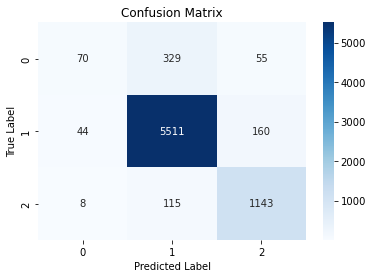

In [31]:
# Evaluate the model
print("Accuracy:", accuracy_score(Test_Y, predictions_SVM))
print("Classification Report:\n", classification_report(Test_Y, predictions_SVM))

# Compute the confusion matrix
conf_matrix = confusion_matrix(Test_Y, predictions_SVM)

# Compute and plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=SVM.classes_, yticklabels=SVM.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


SVM Accuracy Score ->  90.5581708137189
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.16      0.24       427
           1       0.93      0.96      0.94      5747
           2       0.84      0.90      0.87      1261

    accuracy                           0.91      7435
   macro avg       0.77      0.67      0.69      7435
weighted avg       0.89      0.91      0.89      7435



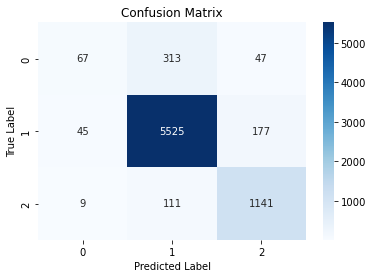

In [46]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt


# Initialise necessary objects
word_Lemmatized = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Tag map for WordNetLemmatizer to understand POS tags
tag_map = {'N': 'n', 'V': 'v', 'R': 'r', 'J': 'a'}

# Preprocess the tweets
for index, entry in enumerate(Corpus['tweet']):
    Final_words = []
    for word, tag in pos_tag(entry):
        if word not in stop_words and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word, tag_map.get(tag[0], 'n'))  # default to 'n' if tag not found
            Final_words.append(word_Final)
    Corpus.loc[index, 'tweet_final'] = ' '.join(Final_words)

    
# Split data into training and testing sets
Train_X, Test_X, Train_Y, Test_Y = train_test_split(Corpus['tweet_final'], Corpus['class'], test_size=0.3, random_state=42)

# Vectorize the text data
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(Corpus['tweet_final'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

# Train the SVM model
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf, Train_Y)

# Make predictions on the test set
predictions_SVM = SVM.predict(Test_X_Tfidf)

# Evaluate the model
print("SVM Accuracy Score -> ", accuracy_score(predictions_SVM, Test_Y) * 100)
print("Classification Report:\n", classification_report(Test_Y, predictions_SVM))

# Compute and plot the confusion matrix
conf_matrix = confusion_matrix(Test_Y, predictions_SVM)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=SVM.classes_, yticklabels=SVM.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['auto', 'scale']}
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2)
grid.fit(Train_X_Tfidf, Train_Y)

# Use the best estimator
best_SVM = grid.best_estimator_
predictions_SVM = best_SVM.predict(Test_X_Tfidf)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   7.2s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   7.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   7.1s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   7.1s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   7.1s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   6.4s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   6.3s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   6.2s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   6.3s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   6.3s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   7.3s
[CV] END ..................C=0.1, gamma=scale, k

In [48]:
#data balancing

In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
Train_X_Tfidf, Train_Y = smote.fit_resample(Train_X_Tfidf, Train_Y)


In [19]:
weight_for_0 = (1 / 1430)*(24783)/3.0 
weight_for_1 = (1 / 19190)*(24783)/3.0
weight_for_2 = (1 / 4163)*(24783)/3.0


class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))
print('Weight for class 2: {:.2f}'.format(weight_for_2))

Weight for class 0: 5.78
Weight for class 1: 0.43
Weight for class 2: 1.98


SVM Accuracy Score ->  80.8338937457969
Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.61      0.32       419
           1       0.97      0.80      0.88      5752
           2       0.76      0.93      0.84      1264

    accuracy                           0.81      7435
   macro avg       0.65      0.78      0.68      7435
weighted avg       0.89      0.81      0.84      7435



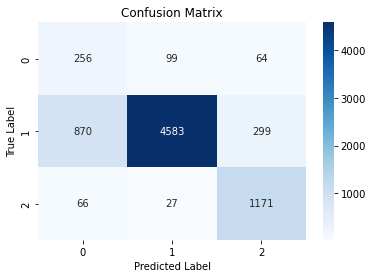

In [21]:
# SVM with Class weight adjustment
SVM = svm.SVC(C=1.0, kernel='linear', class_weight={0: 3, 1: 0.5, 2: 2}, degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf, Train_Y)

# Make predictions
predictions_SVM = SVM.predict(Test_X_Tfidf)

# Evaluate
print("SVM Accuracy Score -> ", accuracy_score(predictions_SVM, Test_Y) * 100)
print("Classification Report:\n", classification_report(Test_Y, predictions_SVM))

# Compute and plot confusion matrix
conf_matrix = confusion_matrix(Test_Y, predictions_SVM)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=SVM.classes_, yticklabels=SVM.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


SVM Accuracy Score ->  80.86079354404842
Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.70      0.38       454
           1       0.98      0.78      0.87      5715
           2       0.75      0.95      0.84      1266

    accuracy                           0.81      7435
   macro avg       0.66      0.81      0.70      7435
weighted avg       0.90      0.81      0.84      7435



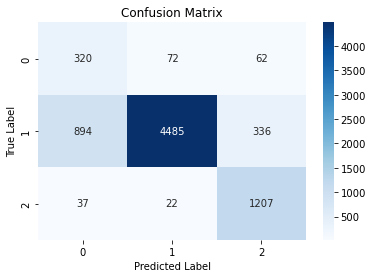

Cross-Validation Scores:  [0.8619666  0.88002474 0.87285096 0.87495362 0.87458256]
Mean CV Score:  0.8728756957328386


SVC(C=0.1, class_weight={0: 1.5, 1: 1, 2: 1.25}, gamma='auto', kernel='linear')

In [35]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE for oversampling
smote = SMOTE(random_state=42)

# Apply SMOTE on the training data
Train_X_SMOTE, Train_Y_SMOTE = smote.fit_resample(Train_X_Tfidf, Train_Y)
# Train the SVM model with a lower C value
SVM = svm.SVC(C=0.1, kernel='linear', class_weight={0: 1.5, 1: 1, 2: 1.25}, degree=3, gamma='auto')
SVM.fit(Train_X_SMOTE, Train_Y_SMOTE)
# Make predictions on the test set
predictions_SVM = SVM.predict(Test_X_Tfidf)

# Evaluate the model
print("SVM Accuracy Score -> ", accuracy_score(predictions_SVM, Test_Y) * 100)
print("Classification Report:\n", classification_report(Test_Y, predictions_SVM))

# Compute and plot the confusion matrix
conf_matrix = confusion_matrix(Test_Y, predictions_SVM)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=SVM.classes_, yticklabels=SVM.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cross_val_scores = cross_val_score(SVM, Train_X_SMOTE, Train_Y_SMOTE, cv=5)
print("Cross-Validation Scores: ", cross_val_scores)
print("Mean CV Score: ", cross_val_scores.mean())
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=100)
Train_X_PCA = pca.fit_transform(Train_X_SMOTE.toarray())
Test_X_PCA = pca.transform(Test_X_Tfidf.toarray())

# Re-train the SVM model with PCA-transformed data
SVM.fit(Train_X_PCA, Train_Y_SMOTE)
